In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Preparar bases de dados

In [2]:
base = pd.read_table(r'microdados_enade_2018.txt', sep=';', encoding='latin-1', decimal=',')

In [168]:
# filtrar variáveis necessárias para análise
df = base[['CO_IES', 'CO_CATEGAD', 'CO_ORGACAD', 'CO_CURSO', 'CO_GRUPO', 'CO_MODALIDADE', 'CO_UF_CURSO', 'CO_TURNO_GRADUACAO', 'NT_GER', 'NT_FG', 'NT_CE']]

# base dos cursos de economia
df_economia = df[df['CO_GRUPO'] == 13].reset_index().drop(columns=['CO_GRUPO'])

# base por natureza da entidade
publicas = [93, 115, 116, 10001, 10002, 10003]

df_economia['natureza_entidade'] = df_economia['CO_CATEGAD'].apply(lambda x: "Pública" if x in publicas else "Privada")

df_economia_publicas = df_economia[df_economia['natureza_entidade'] == "Pública"]
df_economia_privadas = df_economia[df_economia['natureza_entidade'] == "Privada"]

# base por turno
df_economia['turno'] = df_economia['CO_TURNO_GRADUACAO'].apply(lambda x: "Matutino" if x == 1 else "Vespertino" if x == 2 else "Integral" if x == 3 else "Noturno")

# UFPR
df_economia_ufpr = df_economia[df_economia['CO_IES'] == 571]

## Primeiras informações

In [169]:
tot_alunos = len(base)

tot_alunos_economia = len(df_economia)

tot_ies = len(base['CO_IES'].unique())

tot_ies_economia = len(df_economia['CO_IES'].unique())

tot_cursos_economia = len(df_economia['CO_CURSO'].unique())

print("Total de alunos:", tot_alunos)
print("Total de alunos em economia:", tot_alunos_economia)
print("Total de IES:", tot_ies)
print("Total de IES com economia:", tot_ies_economia)
print("Total de cursos de economia:", tot_cursos_economia)



Total de alunos: 548127
Total de alunos em economia: 9582
Total de IES: 1762
Total de IES com economia: 160
Total de cursos de economia: 195


### Total de cursos por modalidade

In [170]:
tot_cursos_economia_presenciais = len(df_economia[df_economia['CO_MODALIDADE'] == 1]['CO_CURSO'].unique())
tot_cursos_economia_distancia = tot_cursos_economia - tot_cursos_economia_presenciais

print("Total de cursos de economia presenciais:", tot_cursos_economia_presenciais)
print("Total de cursos de economia distância:", tot_cursos_economia_distancia)

Total de cursos de economia presenciais: 187
Total de cursos de economia distância: 8


### Total de curso por tipo de instituição

Total de cursos de economia públicos: 100
Total de cursos de economia privados: 95


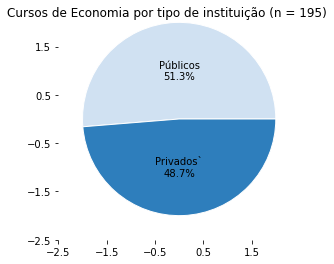

In [171]:
tot_cursos_economia_publicos = len(df_economia_publicas['CO_CURSO'].unique())
tot_cursos_economia_privados = tot_cursos_economia - tot_cursos_economia_publicos
print("Total de cursos de economia públicos:", tot_cursos_economia_publicos)
print("Total de cursos de economia privados:", tot_cursos_economia_privados)

x = [tot_cursos_economia_publicos, tot_cursos_economia_privados]
y = ["Públicos", "Privados"]

colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))

fig, ax = plt.subplots()
ax.pie(x, colors=colors, radius=2, center=(0, 0),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=False)

ax.set_title(f"Cursos de Economia por tipo de instituição (n = " + str(tot_cursos_economia) + ")")
ax.set(xlim=(-2, 2), xticks=np.arange(-2.5, 2.5),
       ylim=(-2, 2), yticks=np.arange(-2.5, 2.5))
ax.text(0, 1, f"Públicos\n{round(tot_cursos_economia_publicos/tot_cursos_economia * 100, 1)}%", ha="center", va="center")
ax.text(0, -1, f"Privados`\n{round(tot_cursos_economia_privados/tot_cursos_economia * 100, 1)}%", ha="center", va="center")
fig.savefig("cursos_economia_tipo_instituicao.png")
plt.show()

## Total de cursos por turno

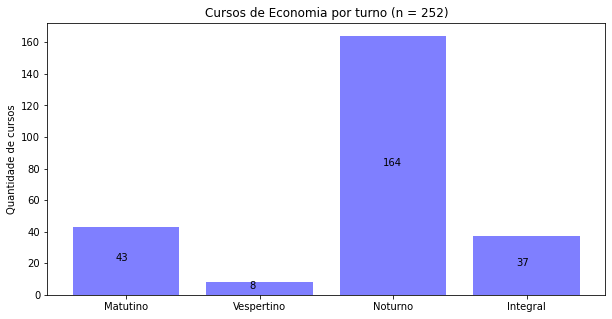

In [172]:
tot_cursos_economia_integral = len(df_economia[df_economia['turno'] == "Integral"]['CO_CURSO'].unique())
tot_cursos_economia_matutino = len(df_economia[df_economia['turno'] == "Matutino"]['CO_CURSO'].unique())
tot_cursos_economia_vespertino = len(df_economia[df_economia['turno'] == "Vespertino"]['CO_CURSO'].unique())
tot_cursos_economia_noturno = len(df_economia[df_economia['turno'] == "Noturno"]['CO_CURSO'].unique())

data = [tot_cursos_economia_matutino, tot_cursos_economia_vespertino, tot_cursos_economia_noturno, tot_cursos_economia_integral]
x = ['Matutino', 'Vespertino', 'Noturno', 'Integral']

fig, ax = plt.subplots()
ax.bar(x, data, color="blue", alpha=0.5)
for i, d in enumerate(data):
    ax.text(i - .08, d / 2, str(d), color='black')
fig.set_size_inches(10, 5)
plt.title("Cursos de Economia por turno (n = 252)")
plt.ylabel("Quantidade de cursos")
plt.show()

# Nota geral dos cursos de conomia

### Dados gerais do Enade

In [173]:
nota_geral_media = base['NT_GER'].mean()
nota_getral_mediana = base['NT_GER'].median()
nota_geral_desvio = base['NT_GER'].std()
print("Média da nota geral:", nota_geral_media)
print("Mediana da nota geral:", nota_getral_mediana)
print("Desvio padrão da nota geral:", nota_geral_desvio)

nota_fg_media = base['NT_FG'].mean()
nota_fg_mediana = base['NT_FG'].median()
nota_fg_desvio = base['NT_FG'].std()
print("Média da nota componetne geral:", nota_fg_media)
print("Mediana da nota componente geral:", nota_fg_mediana)
print("Desvio padrão da nota componente geral:", nota_fg_desvio)

nota_ce_media = base['NT_CE'].mean()
nota_ce_mediana = base['NT_CE'].median()
nota_ce_desvio = base['NT_CE'].std()
print("Média da nota componente específico:", nota_ce_media)
print("Mediana da nota componente específico:", nota_ce_mediana)
print("Desvio padrão da nota componente específico:", nota_ce_desvio)

Média da nota geral: 41.79012335796698
Mediana da nota geral: 41.0
Desvio padrão da nota geral: 14.392336372457992
Média da nota componetne geral: 45.82731896536666
Mediana da nota componente geral: 45.1
Desvio padrão da nota componente geral: 17.822603711499763
Média da nota componente específico: 40.42780897905083
Mediana da nota componente específico: 39.6
Desvio padrão da nota componente específico: 15.561315002100475


### Dados dos cursos de economia

In [174]:
nota_geral_media = df_economia['NT_GER'].mean()
nota_getral_mediana = df_economia['NT_GER'].median()
nota_geral_desvio = df_economia['NT_GER'].std()
print("Média da nota geral:", nota_geral_media)
print("Mediana da nota geral:", nota_getral_mediana)
print("Desvio padrão da nota geral:", nota_geral_desvio)

nota_fg_media = df_economia['NT_FG'].mean()
nota_fg_mediana = df_economia['NT_FG'].median()
nota_fg_desvio = df_economia['NT_FG'].std()
print("Média da nota componetne geral:", nota_fg_media)
print("Mediana da nota componente geral:", nota_fg_mediana)
print("Desvio padrão da nota componente geral:", nota_fg_desvio)

nota_ce_media = df_economia['NT_CE'].mean()
nota_ce_mediana = df_economia['NT_CE'].median()
nota_ce_desvio = df_economia['NT_CE'].std()
print("Média da nota componente específico:", nota_ce_media)
print("Mediana da nota componente específico:", nota_ce_mediana)
print("Desvio padrão da nota componente específico:", nota_ce_desvio)

Média da nota geral: 38.39742351046696
Mediana da nota geral: 37.2
Desvio padrão da nota geral: 13.137758259021018
Média da nota componetne geral: 53.537916511829714
Mediana da nota componente geral: 54.6
Desvio padrão da nota componente geral: 17.352176183543186
Média da nota componente específico: 33.33308559395513
Mediana da nota componente específico: 31.3
Desvio padrão da nota componente específico: 14.147464694747471


## Comparar notas dos cursos de economia e geral

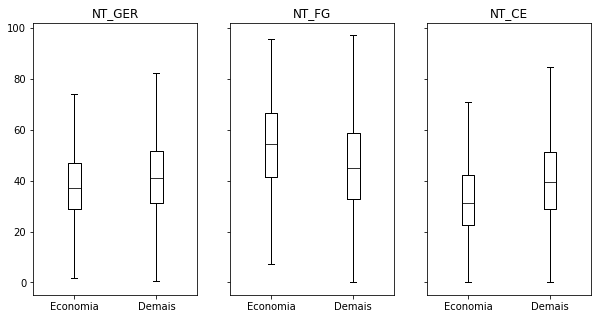

In [175]:
notas = ['NT_GER', 'NT_FG', 'NT_CE']

fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True)

for i, nota in enumerate(notas):
    x1 = df_economia[nota].dropna()
    x2 = base[nota].dropna()
    axs[i].boxplot([x1, x2], labels=['Economia', 'Demais'], showfliers=False,
        medianprops={"color": "black", "linewidth": 0.8})
    axs[i].set_title(nota)
fig.set_size_inches(10, 5)
plt.show()

8073 38.39742351046696 13.137758259021018


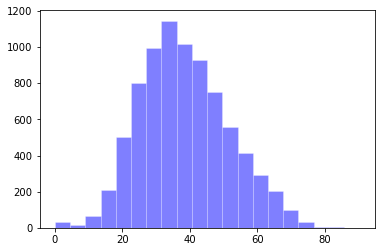

Text(0.5, 1.0, 'Distribuição de probabilidades das notas gerais entre alunos de economia e demais cursos')

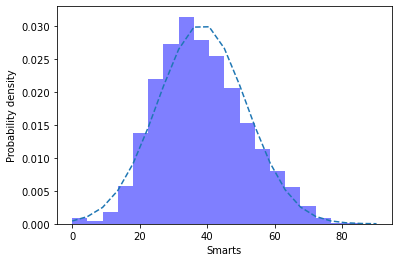

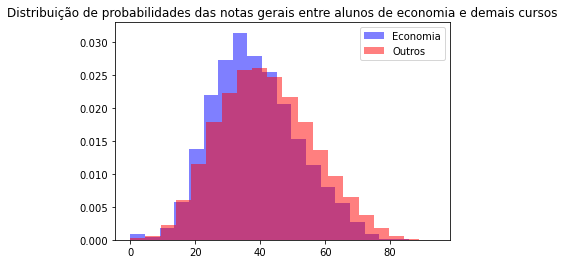

In [177]:
x1 = df_economia['NT_GER'].dropna()
x2 = base[base['CO_GRUPO'] != 13]['NT_GER'].dropna()

print(len(x1), x1.mean(), x1.std())

# Histograma da nota geral em economia

plt.hist(x1, bins=20, alpha=0.5, label='Economia', color='blue', linewidth=0.5, edgecolor="white")
plt.show()


mu = x1.mean()
sigma = x1.std()
num_bins = 20

fig, ax = plt.subplots()

# histograma normalizado
n, bins, patches = ax.hist(x1, num_bins, density=True, 
    color='blue', 
    # edgecolor='black', 
    # linewidth=1, 
    alpha=0.5,)

# Linha de best fit
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')


media = round(x1.mean(), 1)
mediana = round(x1.median(), 1)
std = round(x1.std(), 1)

fig, ax = plt.subplots()
ax.hist(x1, bins=20, color="blue", alpha=0.5, density=True)
ax.hist(x2, bins=20, color="red", alpha=0.5, density=True)
ax.legend(["Economia", "Outros"])
ax.set_title("Distribuição de probabilidades das notas gerais entre alunos de economia e demais cursos")



## Ensino das federais vs. demais

In [191]:
df_economia_federais = df_economia[(df_economia['CO_CATEGAD'] == 93) | (df_economia['CO_CATEGAD'] == 10002)]
df_economia_univ_federais = df_economia_federais[(df_economia_federais['CO_ORGACAD'] == 10028)]

df_economia_nao_fed = df_economia[(df_economia['CO_CATEGAD'] != 93) & (df_economia['CO_CATEGAD'] != 10002)]

In [194]:
print("Notas das federais")
for nota in notas:
    media = round(df_economia_univ_federais[nota].mean(), 1)
    mediana = round(df_economia_univ_federais[nota].median(), 1)
    std = round(df_economia_univ_federais[nota].std(), 1)
    print(f"{nota}, media = {media}, mediana = {mediana}, std = {std}")

print("\nMedidas das demais")
for nota in notas:
    media = round(df_economia_nao_fed[nota].mean(), 1)
    mediana = round(df_economia_nao_fed[nota].median(), 1)
    std = round(df_economia_nao_fed[nota].std(), 1)
    print(f"{nota}, media = {media}, mediana = {mediana}, std = {std}")

Notas das federais
NT_GER, media = 39.8, mediana = 38.7, std = 13.2
NT_FG, media = 55.3, mediana = 56.7, std = 17.2
NT_CE, media = 34.6, mediana = 33.2, std = 14.3

Medidas das demais
NT_GER, media = 37.3, mediana = 35.9, std = 13.0
NT_FG, media = 52.1, mediana = 52.8, std = 17.3
NT_CE, media = 32.3, mediana = 30.1, std = 13.9


# Economia na UFPR

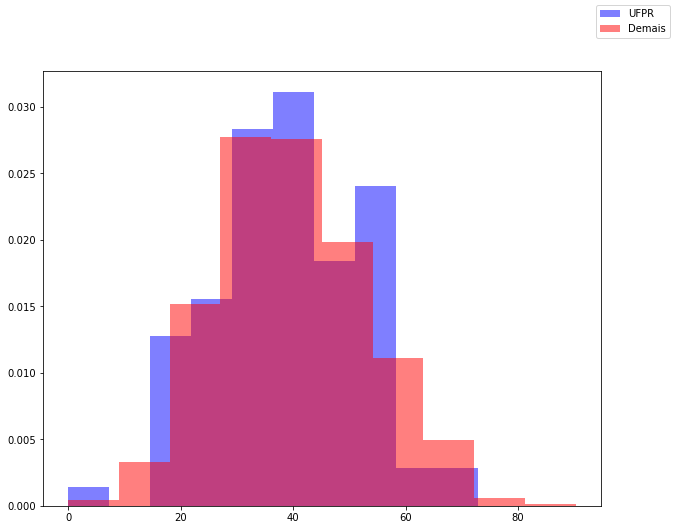

,UFPR,Demais
,0,0
count,97.000000,3512.000000
mean,38.806186,39.803388
std,13.186347,13.180515
min,0.000000,0.000000
25%,30.900000,30.200000
50%,38.800000,38.700000
75%,49.500000,48.700000
max,72.800000,90.200000
median,38.800000,38.700000


In [195]:
x1 = df_economia_ufpr['NT_GER']
x2 = df_economia_univ_federais[df_economia_univ_federais['CO_IES'] != 571]['NT_GER']

num_bins = 10

fig, ax = plt.subplots(sharex=True)
ax1 = ax.hist(x1, num_bins, color='blue', alpha=0.5, label='UFPR', density=True)
ax2 = ax.hist(x2, num_bins, color='red', alpha=0.5, label='Demais', density=True)

fig.legend()

fig.set_size_inches(10, 8)

plt.show()

x1_desc = pd.concat([x1.describe(), pd.DataFrame.from_dict({"median" : x1.median()}, orient='index')])
x2_desc = pd.concat([x2.describe(), pd.DataFrame.from_dict({"median" : x2.median()}, orient='index')])

desc = pd.concat([x1_desc, x2_desc], axis=1, keys=['UFPR', 'Demais'])
desc